# Cost of Sea Level Rise Jupyter Notebook

#### **Collin Yates**, cayates2@ncsu.edu, and _200299698_. ####
#### **NR491 Fall 2022** *Final Project* ####
---

In [327]:
import pandas as pd
import geopandas as gpd
from pathlib import Path
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.colors import Normalize
import numpy as np
import os
import folium
import csv

In [328]:
# Reading in Beaufort Shape and Beaufort CSV

beaufort = pd.read_csv('data/beaufort_stats_final.csv')

beaufort.head()

,OBJECTID,PIN,MAPNUM,BLOCK,PDOT,CONDO_,MOTHER,MAPNAM,PRID,PIN15,...,PLAT_BOOK,PLAT_PAGE,NEIGHBORHO,MUNICIPALI,SHAPESTAre,SHAPESTLen,_mean,_median,_minority,_majority
0,44452,NaN,NaN,NaN,3970,NaN,NaN,NaN,NaN,639500783970B21,...,10T,522,*******BLANK*******,Morehead City,4.330199e+01,30.000250,NaN,NaN,NaN,NaN
1,44695,RACHEL CARSON,6395.0,87.0,1531,NaN,0.0,6395.0,1101700101,639500871531000,...,NaN,NaN,BEAUFORT,Beaufort,3.914208e+06,20926.458041,1.385702,1.0,5.0,1.0
2,44812,63950021,0.0,0.0,2754,NaN,0.0,6395.0,1101700104,639500992754000,...,NaN,NaN,BEAUFORT,Beaufort,6.330864e+05,3118.469552,2.147504,2.0,4.0,2.0
3,45311,63962018,6396.0,90.0,3752,NaN,0.0,639620.0,1101700105,639620903752000,...,NaN,NaN,BEAUFORT,Beaufort,4.261146e+05,2612.327103,1.811045,2.0,3.0,2.0
4,45941,RACHEL CARSON,0.0,0.0,5377,NaN,0.0,6395.0,1101700102,639500985377000,...,NaN,NaN,BEAUFORT,Beaufort,1.492406e+06,7206.722696,1.572812,1.0,4.0,1.0


In [329]:
col_names = beaufort.columns.to_list()
col_names

['OBJECTID',
 'PIN',
 'MAPNUM',
 'BLOCK',
 'PDOT',
 'CONDO_',
 'MOTHER',
 'MAPNAM',
 'PRID',
 'PIN15',
 'WHAT',
 'DeedDate_2',
 'OWNER',
 'DBOOK',
 'DPAGE',
 'DDATE',
 'SALE_PRICE',
 'LAND_VALUE',
 'STRUC_VAL',
 'OTHER_VAL',
 'BLT_CONDO',
 'MAIL_APT',
 'MAIL_HOUSE',
 'MAIL_DIR',
 'MAIL_ST',
 'MAIL_STTYP',
 'MAIL_CITY',
 'MAIL_STATE',
 'MAIL_ZI4',
 'MAIL_ZI5',
 'MAIL_ADD2',
 'TOWNSHIP',
 'CITY_LIMIT',
 'NBHD',
 'FIRE_DIST',
 'RESCUE_DST',
 'LEGAL_DSC',
 'TOTAL_ACR',
 'Y_BLT_HOUS',
 'TOT_SQ_FT',
 'ROLL_TYPE',
 'BATHROOMS',
 'BEDROOMS',
 'SITE_HOUSE',
 'SITE_ST',
 'SITE_DIR',
 'SITE_STTYP',
 'SITE_APTNO',
 'SITE_CITY',
 'Expr1',
 'Total_EMV',
 'Use_Val',
 'Def_Val',
 'MAIL_APT_N',
 'CONDO_SQFT',
 'District',
 'CONDO_NUM',
 'Towns_Desc',
 'True_City',
 'Use_code',
 'Use_desc',
 'Perm_N1',
 'Perm_N2',
 'Perm_Ty1',
 'Perm_Ty2',
 'Perm_De1',
 'Perm_De2',
 'Perm_Is1',
 'Perm_Is2',
 'SCH_Dat1',
 'SCH_Dat2',
 'ACTL_DA1',
 'ACTL_DA2',
 'FondTyp1',
 'FondDes1',
 'FondTyp2',
 'FondDes2',
 'ExWllTyp

In [330]:
#Beaufort Parcel Data that includes Zonal Statistics Calculation from QGIS Plugin (mean, median, majority)
beaufort_eleval = beaufort.iloc[:, [1,17,18,111,112,114]]
beaufort_eleval.head()

,PIN,LAND_VALUE,STRUC_VAL,_mean,_median,_majority
0,NaN,0,0,NaN,NaN,NaN
1,RACHEL CARSON,16174800,0,1.385702,1.0,1.0
2,63950021,1626600,1811390,2.147504,2.0,2.0
3,63962018,1764000,1062362,1.811045,2.0,2.0
4,RACHEL CARSON,6166800,0,1.572812,1.0,1.0


In [331]:
#Shortened name for simplicity and ease of access to use later for making calculations
bev = beaufort_eleval

In [332]:
bev = bev[bev.LAND_VALUE != 0]
bev

,PIN,LAND_VALUE,STRUC_VAL,_mean,_median,_majority
1,RACHEL CARSON,16174800,0,1.385702,1.0,1.0
2,63950021,1626600,1811390,2.147504,2.0,2.0
3,63962018,1764000,1062362,1.811045,2.0,2.0
4,RACHEL CARSON,6166800,0,1.572812,1.0,1.0
5,73050532,502947,206212,2.189474,2.0,2.0
...,...,...,...,...,...,...
3924,NaN,39975,170162,2.000000,2.0,2.0
3925,NaN,50211,258192,2.010417,2.0,2.0
3926,NaN,43189,187735,2.000000,2.0,2.0
3927,NaN,43707,246343,1.971698,2.0,2.0


In [333]:
#Calculated the sum of of land value lost at each elevation based on the _median elevation level of each plot

#bmed1 = beaufort median 1 meter land value sum

bmed1 = bev.loc[bev["_median"] == 1,"LAND_VALUE"].sum() 

bmed2 = bev.loc[bev["_median"] == 2,"LAND_VALUE"].sum() 

bmed3 = bev.loc[bev["_median"] == 3,"LAND_VALUE"].sum() 

bmed4 = bev.loc[bev["_median"] == 4,"LAND_VALUE"].sum()

bmed5 = bev.loc[bev["_median"] == 5,"LAND_VALUE"].sum()

In [334]:
#Calculated the sum of of structural value lost at each elevation based on the _median elevation level of each plot

#bmed1s = beaufort median 1 meter structural value sum

bmed1s = bev.loc[bev["_median"] == 1,"STRUC_VAL"].sum() 

bmed2s = bev.loc[bev["_median"] == 2,"STRUC_VAL"].sum() 

bmed3s = bev.loc[bev["_median"] == 3,"STRUC_VAL"].sum() 

bmed4s = bev.loc[bev["_median"] == 4,"STRUC_VAL"].sum()

bmed5s = bev.loc[bev["_median"] == 5,"STRUC_VAL"].sum()

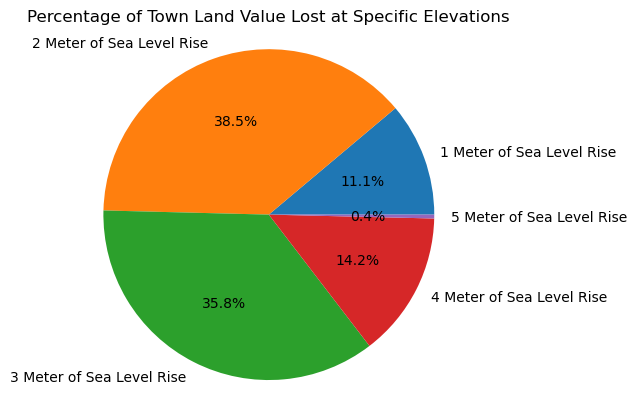

In [335]:
#Matplotlib used to create pie chart taking previous bmed and bmeds values at various levels of sea level elevation, then saved as a png

land_data = [bmed1,bmed2,bmed3,bmed4,bmed5]
land_label = ["1 Meter of Sea Level Rise","2 Meter of Sea Level Rise","3 Meter of Sea Level Rise","4 Meter of Sea Level Rise","5 Meter of Sea Level Rise"]
plt.pie(land_data, labels=land_label, autopct= '%1.1f%%')
plt.title("Percentage of Town Land Value Lost at Specific Elevations")
plt.axis('equal')
plt.show

save_results_to = 'media/'
plt.savefig(save_results_to + 'landloss.png', dpi = 300)

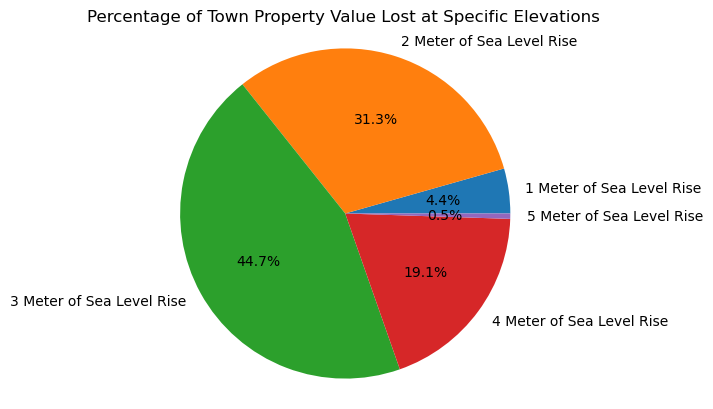

In [336]:
#Matplotlib used to create pie chart taking previous bmed and bmeds values at various levels of sea level elevation, then saved as a png

struc_data = [bmed1s,bmed2s,bmed3s,bmed4s,bmed5]
struc_label = ["1 Meter of Sea Level Rise","2 Meter of Sea Level Rise","3 Meter of Sea Level Rise","4 Meter of Sea Level Rise","5 Meter of Sea Level Rise"]
plt.pie(struc_data, labels=struc_label, autopct= '%1.1f%%')
plt.title("Percentage of Town Property Value Lost at Specific Elevations")
plt.axis('equal')
plt.show

save_results_to = 'media/'
plt.savefig(save_results_to + 'proploss.png', dpi = 300)

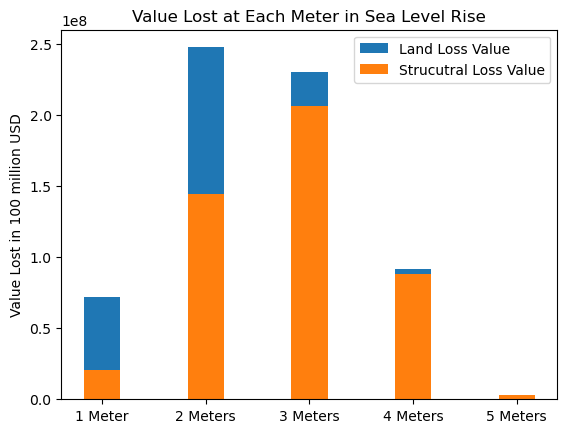

<Figure size 640x480 with 0 Axes>

In [337]:
labels = ['1 Meter', '2 Meters', '3 Meters', '4 Meters', '5 Meters']
land_med = [bmed1,bmed2,bmed3,bmed4,bmed5]
struc_med = [bmed1s, bmed2s, bmed3s, bmed4s, bmed5s]
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, land_med, width, label='Land Loss Value')
ax.bar(labels, struc_med, width, label='Strucutral Loss Value')

ax.set_ylabel('Value Lost in 100 million USD')
ax.set_title('Value Lost at Each Meter in Sea Level Rise')
ax.legend()

plt.show()

save_results_to = 'media/'
plt.savefig(save_results_to + 'struclanloss.png', dpi = 300)

In [338]:
# Create lists for each row we are writing in our csv
header = ['Setting', 'Customize', 'Hints']
info = ['Storymap Info', '', \
    'For help, see tutorial in [HandsOnDataViz.org](https://handsondataviz.org/leaflet-storymaps-with-google-sheets.html)']
title = ['Storymap Title', 'NR491 Cost of Sea Level Rise', '']
subtitle = ['Storymap Subtitle', \
    "Measuring the Economic Impact of Sea Level Rise on Local North Carolina Community<br><small>Scroll down<i class='fafa-chevron-down'></i></small>",\
    "Add your subtitle, or delete that portion"]
logo = ['Storymap Logo', 'media/ncsu_logo.jpg', 'Path to a logo image']
google_analysis = ['Google Analytics Tracking ID', '', 'Sample format: UA-5488840-29']

map_settings = ['Map Settings', '', '']
basemap_tiles = ['Basemap Tiles', 'CartoDB.Positron',\
    '[Drop-down menu for background basemap tiles](https://leaflet-extras.github.io/leaflet-providers/preview/)']
zoom = ['Zoom Controls', 'bottomright', '']
bg_color = ['Narrative Background Color', '', '']
txt_color = ['Narrative Text Color', '', '']
lnk_color = ['Narrative Link Color', '', '']
ch_color = ['Active Chapter Background Color','','']
media_height = ['Media Container Height','300',\
    'Maximum height of the image, in pixels. 200 is default. The image will be fit into the container with its proportions kept (it won\'t be skewed).']
pixels_after_char = ['Pixels After Final Chapter','600','In pixels, at least 100']
lightbox_imgs = ['Enable Lightbox for Images','yes','yes or no']

creds = ['Credits','','']
auth_name = ['Author Name','Collin Yates','Appears in map credits as "View data by..." (or leave blank)']
auth_email = ['Author Email or Website','','Create link in Author Name by inserting your email or web address (or leave blank)']
auth_GH = ['Author GitHub Repo Link','https://github.com/handsondataviz/leaflet-storymaps-with-google-sheets',\
    'Insert your code repo URL to appear as link in "View code..." (or leave blank)']
code_cred = ['Code Credit','<a href="https://handsondataviz.org">HandsOnDataViz</a>',\
    'Appears in credits as "...code by..." (or leave blank)']

In [339]:
# Check that the csv directory exists
if not os.path.exists('./csv'):
    os.mkdir('./csv')

# Create a new Options.csv

# opens a csv file in write mode
# the wuth statement makes sure the file closes properly when we're done
with open('./csv/Options_Template.csv', 'w', newline='') as options:
    # create the csv writer
    writer = csv.writer(options)

    # write a row to the csv file
    writer.writerow(header)

    writer.writerow(info)
    writer.writerow(title)
    writer.writerow(subtitle)
    writer.writerow(logo)
    writer.writerow(google_analysis)

    writer.writerow(map_settings)
    writer.writerow(basemap_tiles)
    writer.writerow(zoom)
    writer.writerow(bg_color)
    writer.writerow(txt_color)
    writer.writerow(lnk_color)
    writer.writerow(ch_color)
    writer.writerow(media_height)
    writer.writerow(pixels_after_char)
    writer.writerow(lightbox_imgs)

    writer.writerow(creds)
    writer.writerow(auth_name)
    writer.writerow(auth_email)
    writer.writerow(auth_GH)
    writer.writerow(code_cred)


In [340]:
# read in the options csv as a data frame
options_df = pd.read_csv('./csv/Options_Template.csv', index_col=0)
options_df

,Customize,Hints
Setting,,
Storymap Info,NaN,"For help, see tutorial in [HandsOnDataViz.org]..."
Storymap Title,NR491 Cost of Sea Level Rise,NaN
Storymap Subtitle,Measuring the Economic Impact of Sea Level Ris...,"Add your subtitle, or delete that portion"
Storymap Logo,media/ncsu_logo.jpg,Path to a logo image
Google Analytics Tracking ID,NaN,Sample format: UA-5488840-29
Map Settings,NaN,NaN
Basemap Tiles,CartoDB.Positron,[Drop-down menu for background basemap tiles](...
Zoom Controls,bottomright,NaN
Narrative Background Color,NaN,NaN


In [341]:
options_df['Customize']['Narrative Background Color'] = 'lightgray'
options_df['Customize']['Author Name'] = 'Collin Yates'
options_df['Customize']['Author GitHub Repo Link'] = 'https://github.com/cayates2/Final-Project-nr491'
options_df['Customize']['Storymap Title'] = 'The Cost of Sea Level Rise'
options_df['Customize']['Storymap Subtitle'] = 'Story map discussing sea level rise and its economic impact on local communities in North Carolina'
options_df['Customize']['Author Email or Website'] = 'cayates2@ncsu.edu'
options_df.to_csv('./csv/Options.csv')

options_df

,Customize,Hints
Setting,,
Storymap Info,NaN,"For help, see tutorial in [HandsOnDataViz.org]..."
Storymap Title,The Cost of Sea Level Rise,NaN
Storymap Subtitle,Story map discussing sea level rise and its ec...,"Add your subtitle, or delete that portion"
Storymap Logo,media/ncsu_logo.jpg,Path to a logo image
Google Analytics Tracking ID,NaN,Sample format: UA-5488840-29
Map Settings,NaN,NaN
Basemap Tiles,CartoDB.Positron,[Drop-down menu for background basemap tiles](...
Zoom Controls,bottomright,NaN
Narrative Background Color,lightgray,NaN


In [342]:
m = folium.Map(location=[35.4567, -48.2239], zoom_start=5, control_scale=True)
m

In [355]:
chapter_df = pd.read_csv('./csv/Chapters.csv')
chapter_df

,Unnamed: 0.1,Unnamed: 0,Chapter,Media Link,Media Credit,Media Credit Link,Description,Zoom,Marker,Marker Color,Location,Latitude,Longitude,Overlay,Overlay Transparency,GeoJSON Overlay,GeoJSON Feature Properties
0,0,0.0,Overview of Atlantic,media/gulf_stream.png,Source: USGS,https://www.usgs.gov/media/images/map-north-at...,This is a test.,3.0,Hidden,NaN,North Atlantic,35.503600,-69.423450,NaN,NaN,NaN,NaN
1,1,1.0,Effects on North Carolina,media/wilm_chang.png,sealevelrise.org,https://sealevelrise.org/states/north-carolina...,With this abnormal amount of water being pushe...,10.0,plain,blue,"Wilmington, NC",34.208603,-77.893531,NaN,NaN,NaN,NaN
2,2,2.0,Increase in Abnormal Flood Events,media/sun_flood.jpg,UNC Chapel Hill,https://tarheels.live/sunnydayflood/,NaN,16.0,plain,blue,"Beaufort, NC",34.716182,-76.664366,NaN,NaN,NaN,NaN
3,3,3.0,Beaufort Sea Level Rise Trends,media/beaufort_change.png,sealevelrise.org,https://sealevelrise.org/states/north-carolina...,NaN,16.0,plain,blue,"Beaufort, NC",34.723800,-76.649170,NaN,NaN,NaN,NaN
4,4,NaN,Project Results,media/combinedchart.JPG,Generated using matplotlib,https://matplotlib.org/stable/plot_types/index...,NaN,12.0,hidden,blue,"Beaufort, NC",34.731330,-76.645850,NaN,NaN,geojson/Zonal Stats.geojson,fillColor:blue;color:black


In [344]:
chapters_df.columns

Index(['Unnamed: 0', 'Chapter', 'Media Link', 'Media Credit',
       'Media Credit Link', 'Description', 'Zoom', 'Marker', 'Marker Color',
       'Location', 'Latitude', 'Longitude', 'Overlay', 'Overlay Transparency',
       'GeoJSON Overlay', 'GeoJSON Feature Properties'],
      dtype='object')

In [345]:
chapter_df.to_csv('./csv/Chapters.csv')

In [354]:
chapters_df.columns

Index(['Unnamed: 0', 'Chapter', 'Media Link', 'Media Credit',
       'Media Credit Link', 'Description', 'Zoom', 'Marker', 'Marker Color',
       'Location', 'Latitude', 'Longitude', 'Overlay', 'Overlay Transparency',
       'GeoJSON Overlay', 'GeoJSON Feature Properties'],
      dtype='object')

### Added chapters to story map below

In [347]:
chapter_df.loc[1, "Chapter"] = "Effects on North Carolina"
chapter_df.loc[1, "Media Link"] = "media/wilm_chang.png"
chapter_df.loc[1, "Media Credit"] = "sealevelrise.org"
chapter_df.loc[1, "Media Credit Link"] = "https://sealevelrise.org/states/north-carolina/#:~:text=And%20It's%20Costing%20Over%20%242%20Billion&text=This%20increase%20is%20mostly%20due,and%20vulnerability%20to%20coastal%20storms."
chapter_df.loc[1, "Description"] = "With this abnormal amount of water being pushed towards the east coast, major cities and towns on the coast have had to deal with an increased rate of sea level rise over the past few years. From the graph displayed, it depicts the City of Wilmington's rise in sea level. Since 1950, there has been a dramatic increase, with over an 11 inch rise in water levels."
chapter_df.loc[1, "Zoom"] = "10"
chapter_df.loc[1, "Marker"] = "plain"
chapter_df.loc[1, "Marker Color"] = "blue"
chapter_df.loc[1, "Location"] = "Wilmington, NC"
chapter_df.loc[1, "Latitude"] = "34.20860292498924"
chapter_df.loc[1, "Longitude"] = "-77.89353114975715"

In [348]:
chapter_df.loc[2, "Chapter"] = "Increase in Abnormal Flood Events"
chapter_df.loc[2, "Media Link"] = "media/sun_flood.jpg"
chapter_df.loc[2, "Media Credit"] = "UNC Chapel Hill"
chapter_df.loc[2, "Media Credit Link"] = "https://tarheels.live/sunnydayflood/"
chapter_df.loc[2, "Description"] = ""
chapter_df.loc[2, "Zoom"] = "16"
chapter_df.loc[2, "Marker"] = "plain"
chapter_df.loc[2, "Marker Color"] = "blue"
chapter_df.loc[2, "Location"] = "Beaufort, NC"
chapter_df.loc[2, "Latitude"] = "34.716181939999245"
chapter_df.loc[2, "Longitude"] = "-76.6643659403665"

In [349]:
chapter_df.loc[3, "Chapter"] = "Beaufort Sea Level Rise Trends"
chapter_df.loc[3, "Media Link"] = "media/beaufort_change.png"
chapter_df.loc[3, "Media Credit"] = "sealevelrise.org"
chapter_df.loc[3, "Media Credit Link"] = "https://sealevelrise.org/states/north-carolina/#:~:text=And%20It's%20Costing%20Over%20%242%20Billion&text=This%20increase%20is%20mostly%20due,and%20vulnerability%20to%20coastal%20storms."
chapter_df.loc[3, "Description"] = ""
chapter_df.loc[3, "Zoom"] = "16"
chapter_df.loc[3, "Marker"] = "plain"
chapter_df.loc[3, "Marker Color"] = "blue"
chapter_df.loc[3, "Location"] = "Beaufort, NC"
chapter_df.loc[3, "Latitude"] = "34.72380029408167"
chapter_df.loc[3, "Longitude"] = "-76.64916985713339"

In [350]:
chapter_df.loc[4, "Chapter"] = "Project Results"
chapter_df.loc[4, "Media Link"] = "media/combinedchart.JPG"
chapter_df.loc[4, "Media Credit"] = "Generated using matplotlib"
chapter_df.loc[4, "Media Credit Link"] = "https://matplotlib.org/stable/plot_types/index.html"
chapter_df.loc[4, "Description"] = ""
chapter_df.loc[4, "Zoom"] = "12"
chapter_df.loc[4, "Marker"] = "hidden"
chapter_df.loc[4, "Marker Color"] = "blue"
chapter_df.loc[4, "Location"] = "Beaufort, NC"
chapter_df.loc[4, "Latitude"] = "34.73133"
chapter_df.loc[4, "Longitude"] = "-76.64585"
chapter_df.loc[4, "GeoJSON Overlay"] = "geojson/Zonal Stats.geojson"
chapter_df.loc[4, "GeoJSON Feature Properties"] = "fillColor:blue;color:black"


In [351]:
# nc_colleges_wgs84 = nc_colleges.to_crs(epsg=4326)

#chapter_df.loc[4, "GeoJSON Overlay"] = "geojson/NCSU_campuses.geojson"

# We can also set different parameters for the GeoJSON
# These parameters are: fillColor, weight, opacity, color, and fillOpacity
#chapter_df.loc[4, "GeoJSON Feature Properties"] = "fillColor:red;color:black"

# save the Chapters.csv and look at the index.html file
#chapter_df.to_csv('./csv/Chapters.csv')

### Saved chapter_df dataframe to a Chapters.csv

In [352]:
chapter_df.to_csv('./csv/Chapters.csv')

In [353]:
# Checkin to see if all information was added properly
chapter_df.head()

,Unnamed: 0,Chapter,Media Link,Media Credit,Media Credit Link,Description,Zoom,Marker,Marker Color,Location,Latitude,Longitude,Overlay,Overlay Transparency,GeoJSON Overlay,GeoJSON Feature Properties
0,0.0,Overview of Atlantic,media/gulf_stream.png,Source: USGS,https://www.usgs.gov/media/images/map-north-at...,This is a test.,3.0,Hidden,NaN,North Atlantic,35.5036,-69.42345,NaN,NaN,NaN,NaN
1,1.0,Effects on North Carolina,media/wilm_chang.png,sealevelrise.org,https://sealevelrise.org/states/north-carolina...,With this abnormal amount of water being pushe...,10,plain,blue,"Wilmington, NC",34.20860292498924,-77.89353114975715,NaN,NaN,NaN,NaN
2,2.0,Increase in Abnormal Flood Events,media/sun_flood.jpg,UNC Chapel Hill,https://tarheels.live/sunnydayflood/,,16,plain,blue,"Beaufort, NC",34.716181939999245,-76.6643659403665,NaN,NaN,NaN,NaN
3,3.0,Beaufort Sea Level Rise Trends,media/beaufort_change.png,sealevelrise.org,https://sealevelrise.org/states/north-carolina...,,16,plain,blue,"Beaufort, NC",34.72380029408167,-76.64916985713339,NaN,NaN,NaN,NaN
4,NaN,Project Results,media/combinedchart.JPG,Generated using matplotlib,https://matplotlib.org/stable/plot_types/index...,,12,hidden,blue,"Beaufort, NC",34.73133,-76.64585,NaN,NaN,geojson/Zonal Stats.geojson,fillColor:blue;color:black
